# Monte Carlo $\pi$ Approximation

This notebook demonstrates how to approximate the value of $\pi$ using the [Monte Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method). The algorithm randomly samples points in a square and estimates $\pi$ based on the proportion of points that fall inside a unit circle.

---

## 1. Import Required Libraries

We use `numpy` for random number generation and `matplotlib` for visualization.

---

In [8]:
import numpy as np
from matplotlib.pyplot import subplots, show
from matplotlib.patches import Circle
from math import pi
from time import time
from tqdm import tqdm

t_start = time()

# Simulation parameters

In [9]:
num_points = 100_000_000

# Generate random points

In [10]:
with tqdm(total=1, desc="Generating random points") as pbar:
    t = time()
    x = np.random.uniform(-1, 1, num_points)
    y = np.random.uniform(-1, 1, num_points)
    tqdm.write(f"Generated {num_points} random points in {time() - t:.3f} seconds.")
    pbar.update(1)

Generating random points: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

Generated 100000000 random points in 0.772 seconds.


# Mask for points inside the unit circle

In [11]:
chunk_size = 10_000_000
num_chunks = int(np.ceil(num_points / chunk_size))

inside = 0
x_in_list, y_in_list = [], []
x_out_list, y_out_list = [], []

with tqdm(total=num_chunks, desc="Processing points") as pbar:
    t = time()
    for i in range(num_chunks):
        start = i * chunk_size
        end = min((i + 1) * chunk_size, num_points)
        x_chunk = x[start:end]
        y_chunk = y[start:end]
        mask_in = x_chunk**2 + y_chunk**2 <= 1
        inside += mask_in.sum()
        x_in_list.append(x_chunk[mask_in])
        y_in_list.append(y_chunk[mask_in])
        x_out_list.append(x_chunk[~mask_in])
        y_out_list.append(y_chunk[~mask_in])
        pbar.update(1)
    tqdm.write(f"Calculated points inside the circle in {time() - t:.3f} seconds.")

x_in = np.concatenate(x_in_list)
y_in = np.concatenate(y_in_list)
x_out = np.concatenate(x_out_list)
y_out = np.concatenate(y_out_list)

Processing points: 100%|██████████| 10/10 [00:00<00:00, 10.75it/s]


Calculated points inside the circle in 0.930 seconds.


# π approximation

In [12]:
pi_approx = 4 * inside / num_points

# Visualization

Plotting results:   0%|          | 0/1 [00:00<?, ?it/s]

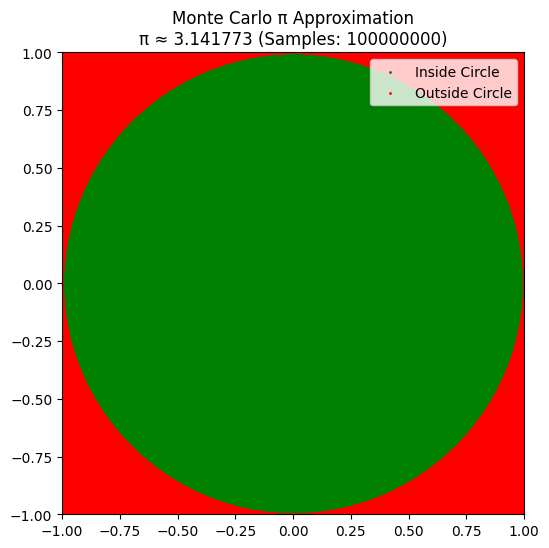

Plotting results: 100%|██████████| 1/1 [00:09<00:00,  9.58s/it]

Plotted the results in 9.576 seconds.


In [13]:
with tqdm(total=1, desc="Plotting results") as pbar:
    t = time()
    fig, ax = subplots(figsize=(6, 6))
    ax.set_aspect("equal")
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.add_patch(Circle((0, 0), 1, color="lightblue", fill=False))
    ax.scatter(x_in, y_in, color="green", s=1, label="Inside Circle")
    ax.scatter(x_out, y_out, color="red", s=1, label="Outside Circle")
    ax.set_title(f"Monte Carlo π Approximation\nπ ≈ {pi_approx:.6f} (Samples: {num_points})")
    ax.legend(loc="upper right")
    show()
    tqdm.write(f"Plotted the results in {time() - t:.3f} seconds.")
    pbar.update(1)

# Print the results

In [14]:
print(f"\nFinal π approximation after {num_points} samples: {pi_approx:.6f}")
print(f"Monte Carlo π approximation: {pi_approx:.6f}")
print(f"Actual π value: {pi:.6f}")
print(f"Absolute error: {abs(pi_approx - pi):.6f}")
print(f"Total execution time: {int((time()-t_start)//60)} min {(time()-t_start)%60:.2f} sec.")


Final π approximation after 100000000 samples: 3.141773
Monte Carlo π approximation: 3.141773
Actual π value: 3.141593
Absolute error: 0.000180
Total execution time: 0 min 11.43 sec.
